## Preliminary Data Exploration and Visualization

In [0]:
import pandas as pd
from tqdm import tqdm
import sqlite3
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display
from colorama import Fore,Style
from stat import *
from scipy import stats
from sklearn.manifold import TSNE
import matplotlib.patheffects as PathEffects
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [0]:

%matplotlib inline 
# This command figures show up in the notebook.  It's a "magic" command...
# Typically, this now happens by default so it is often an unnecessary command, but is good for standardization.
plt.rcParams['font.family'] = 'Times New Roman'

plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.show()

In [0]:
conn = sqlite3.connect(r"D:\Study\mimic-code\mimic.db")
cursor= conn.cursor()

#### List the tables
Here we list 15 tables we used in this project, and some tables are added after data preprocessed

In [0]:
tables = pd.read_sql("SELECT * FROM sqlite_master where type='table'",conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,chartevent,chartevent,2,"CREATE TABLE ""chartevent"" (\n""ROW_ID"" INTEGER,..."
1,table,admission,admission,7463507,"CREATE TABLE ""admission"" (\n""ROW_ID"" INTEGER,\..."
2,table,icustay,icustay,7466383,"CREATE TABLE ""icustay"" (\n""ROW_ID"" INTEGER,\n ..."
3,table,service,service,7885894,"CREATE TABLE ""service"" (\n""ROW_ID"" INTEGER,\n ..."
4,table,diagnosis,diagnosis,7886693,"CREATE TABLE ""diagnosis"" (\n""ROW_ID"" INTEGER,\..."
5,table,patient,patient,7890810,"CREATE TABLE ""patient"" (\n""ROW_ID"" INTEGER,\n ..."
6,table,output,output,7891447,"CREATE TABLE ""output"" (\n""ROW_ID"" INTEGER,\n ..."
7,table,labevents,labevents,7467812,"CREATE TABLE ""labevents"" (\n""ROW_ID"" INTEGER,\..."
8,table,inputevents_mv,inputevents_mv,7975528,"CREATE TABLE ""inputevents_mv"" (\n""ROW_ID"" INTE..."
9,table,inputevents_cv,inputevents_cv,8186836,"CREATE TABLE ""inputevents_cv"" (\n""ROW_ID"" INTE..."


#### Display first 3 rows of original tables from MIMIC

First 3 rows of each table are listed below. 

In [0]:
table_dict = {}
k = 0
for table in tables.tbl_name:
    table_dict[table]=pd.read_sql("SELECT * FROM %s LIMIT 3" % table, conn)
    print('\033[1m' + "Table: %s" % table )
    if k==10:
        break;
    k += 1
    display(table_dict[table])

Table: chartevent


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,CHARTTIME,STORETIME,CGID,VALUE,VALUENUM,VALUEUOM,WARNING,ERROR,RESULTSTATUS,STOPPED
0,788,36,165660,241249,223834,2134-05-12 12:00:00,2134-05-12 13:56:00,17525,15.00,15.00,L/min,0,0,None,None
1,789,36,165660,241249,223835,2134-05-12 12:00:00,2134-05-12 13:56:00,17525,100.00,100.00,None,0,0,None,None
2,790,36,165660,241249,224328,2134-05-12 12:00:00,2134-05-12 12:18:00,20823,0.37,0.37,None,0,0,None,None


Table: admission


,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,None,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,None,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,None,CATHOLIC,MARRIED,WHITE,None,None,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1
2,23,23,124321,2157-10-18 19:34:00,2157-10-25 14:00:00,None,EMERGENCY,TRANSFER FROM HOSP/EXTRAM,HOME HEALTH CARE,Medicare,ENGL,CATHOLIC,MARRIED,WHITE,None,None,BRAIN MASS,0,1


Table: icustay


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939


Table: service


,ROW_ID,SUBJECT_ID,HADM_ID,TRANSFERTIME,PREV_SERVICE,CURR_SERVICE
0,758,471,135879,2122-07-22 14:07:27,TSURG,MED
1,759,471,135879,2122-07-26 18:31:49,MED,TSURG
2,760,472,173064,2172-09-28 19:22:15,None,CMED


Table: diagnosis


,ROW_ID,SUBJECT_ID,HADM_ID,SEQ_NUM,ICD9_CODE
0,1297,109,172335,1.0,40301
1,1298,109,172335,2.0,486
2,1299,109,172335,3.0,58281


Table: patient


,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,None,None,None,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,None,1
2,236,251,M,2090-03-15 00:00:00,None,None,None,0


Table: output


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,ITEMID,VALUE,VALUEUOM,STORETIME,CGID,STOPPED,NEWBOTTLE,ISERROR
0,344,21219,177991.0,225765.0,2142-09-08 10:00:00,40055,200.0,ml,2142-09-08 12:08:00,17269,None,None,None
1,345,21219,177991.0,225765.0,2142-09-08 12:00:00,40055,200.0,ml,2142-09-08 12:08:00,17269,None,None,None
2,346,21219,177991.0,225765.0,2142-09-08 13:00:00,40055,120.0,ml,2142-09-08 13:39:00,17269,None,None,None


Table: labevents


,ROW_ID,SUBJECT_ID,HADM_ID,ITEMID,CHARTTIME,VALUE,VALUENUM,VALUEUOM,FLAG
0,281,3,None,50820,2101-10-12 16:07:00,7.39,7.39,units,None
1,282,3,None,50800,2101-10-12 18:17:00,ART,NaN,None,None
2,283,3,None,50802,2101-10-12 18:17:00,-1,-1.00,mEq/L,None


Table: inputevents_mv


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,RATE,...,TOTALAMOUNTUOM,ISOPENBAG,CONTINUEINNEXTDEPT,CANCELREASON,STATUSDESCRIPTION,COMMENTS_EDITEDBY,COMMENTS_CANCELEDBY,COMMENTS_DATE,ORIGINALAMOUNT,ORIGINALRATE
0,241,27063,139787,223259,2133-02-05 06:29:00,2133-02-05 08:45:00,225166,6.774532,mEq,NaN,...,ml,0,0,1,Rewritten,None,RN,2133-02-05 12:52:00,10.000000,0.050000
1,242,27063,139787,223259,2133-02-05 05:34:00,2133-02-05 06:30:00,225944,28.132997,ml,30.142497,...,ml,0,0,0,FinishedRunning,None,None,None,28.132998,30.255817
2,243,27063,139787,223259,2133-02-05 05:34:00,2133-02-05 06:30:00,225166,2.813300,mEq,NaN,...,ml,0,0,0,FinishedRunning,None,None,None,2.813300,0.050426


Table: inputevents_cv


,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,CHARTTIME,ITEMID,AMOUNT,AMOUNTUOM,RATE,RATEUOM,...,ORDERID,LINKORDERID,STOPPED,NEWBOTTLE,ORIGINALAMOUNT,ORIGINALAMOUNTUOM,ORIGINALROUTE,ORIGINALRATE,ORIGINALRATEUOM,ORIGINALSITE
0,592,24457,184834.0,205776.0,2193-09-11 09:00:00,30056,100.0,ml,None,None,...,756654,9359133,None,None,None,ml,Oral,None,None,None
1,593,24457,184834.0,205776.0,2193-09-11 12:00:00,30056,200.0,ml,None,None,...,3564075,9359133,None,None,None,ml,Oral,None,None,None
2,594,24457,184834.0,205776.0,2193-09-11 16:00:00,30056,160.0,ml,None,None,...,422646,9359133,None,None,None,ml,Oral,None,None,None


Table: d_labitems


### <span style="color:blue">PATIENTS</span>

#### Total death patients

In [0]:
pd.read_sql("SELECT COUNT(*) AS total_death FROM patient WHERE DOD IS NOT NULL", conn)

,total_death
0,15759


#### Gender breakdown

In [0]:
df_pat = pd.read_sql("SELECT * FROM patient",conn)
df_pat.head(2)

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,None,None,None,0
1,235,250,F,2164-12-27 00:00:00,2188-11-22 00:00:00,2188-11-22 00:00:00,None,1


In [0]:
pd.read_sql("SELECT gender,COUNT(*) as gender_count FROM patient GROUP BY gender ORDER BY gender_count DESC ", conn)

,GENDER,gender_count
0,M,26121
1,F,20399


In [0]:
F_count = (df_pat['GENDER']=='F').sum()
M_count = (df_pat['GENDER']=='M').sum()
M_perc = M_count/df_pat['GENDER'].shape[0]
F_perc = 1 - M_perc

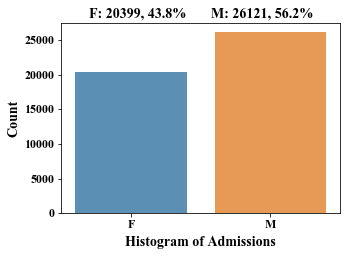

In [0]:
plt.figure(figsize=(5,3.5))
g=sns.countplot(df_pat['GENDER'],alpha=.8)
plt.title('F: {}, {:.1%}       M: {}, {:.1%}'.format(F_count,F_perc,M_count,M_perc))
plt.ylabel("Count")
plt.xlabel("Histogram of Admissions")
plt.savefig("image/f_m_ratio.svg",bbox_inches='tight')

Of the 46520 patients that were admitted to the hospital, 43.8% are females and 56.2% are males.

In [0]:
df_pat['DOD']=df_pat['DOD'].fillna(0)

In [0]:
df_pat['DOD']=df_pat['DOD'].apply(lambda x: 0 if x==0 else 1)

In [0]:
df_pat.head(2)

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG
0,234,249,F,2075-03-13 00:00:00,0,None,None,0
1,235,250,F,2164-12-27 00:00:00,1,2188-11-22 00:00:00,None,1


In [0]:
df_pat.to_sql('df_pat', con=conn, if_exists='replace', index=False)

In [0]:
homo_cnt=pd.read_sql("SELECT gender,COUNT(*) as gender_count ,dod FROM df_pat GROUP BY dod , gender ORDER BY gender_count DESC ", conn)

In [0]:
homo_cnt.head()

,GENDER,gender_count,DOD
0,M,17597,0
1,F,13164,0
2,M,8524,1
3,F,7235,1


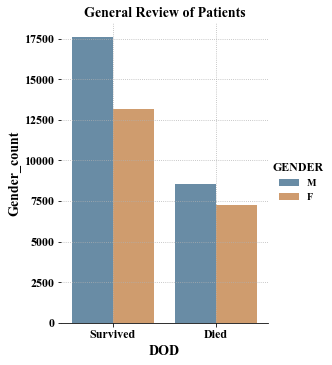

In [0]:
g = sns.catplot(x="DOD", y="gender_count",hue="GENDER",kind="bar", data=homo_cnt, saturation=.5,\
              ci=None, aspect=0.8,alpha=.8)
(g.set_axis_labels("DOD", "Gender_count")\
  .set_xticklabels(["Survived", "Died", "Children"])\
  .set_titles("{col_name} {col_var}")
 .despine(left=True))
plt.grid(linestyle='dotted')
plt.title("General Review of Patients")
plt.savefig("image/death_ratio.svg",bbox_inches='tight')

We divided the patients by gender and mortality status. Of 30761 patients who were survived,there were 17597 males and 13164 females. Of 15759 patients who were survived,there were 8524 males and 7235 females. 

#### Death Analysis by Age

In [0]:
df_death = pd.read_sql("SELECT * FROM patient WHERE DOD IS NOT NULL",conn)

In [0]:
df_death['DOD'] = pd.to_datetime(df_death['DOD'])
df_death['DOB'] = pd.to_datetime(df_death['DOB'])
df_death['Age'] = ((df_death['DOD'] - df_death['DOB']).dt.days)//360
df_death =df_death[df_death['Age']>=0]

In [0]:
df_death['DOD']=df_death['DOD'].fillna(0)
df_death['DOD']=df_death['DOD'].apply(lambda x: 0 if x==0 else 1)

In [0]:
df_death.head()

,ROW_ID,SUBJECT_ID,GENDER,DOB,DOD,DOD_HOSP,DOD_SSN,EXPIRE_FLAG,Age
0,235,250,F,2164-12-27,1,2188-11-22 00:00:00,None,1,24
1,241,257,F,2031-04-03,1,2121-07-08 00:00:00,2121-07-08 00:00:00,1,91
2,244,261,M,2025-08-04,1,2102-06-29 00:00:00,2102-06-29 00:00:00,1,78
3,246,263,M,2104-06-18,1,2168-06-13 00:00:00,None,1,64
4,251,268,F,2132-02-21,1,2198-02-18 00:00:00,None,1,66


In [0]:
f_death = df_death[df_death['GENDER']=='F'].shape[0]
m_death = df_death[df_death['GENDER']=='M'].shape[0]

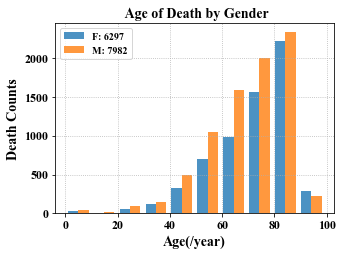

In [0]:
plt.figure(figsize=(5,3.5))
plt.hist([df_death[df_death['GENDER']=='F'].Age,df_death[df_death['GENDER']=='M'].Age],alpha=.8,label=['F: %d'%f_death,'M: %d'%m_death])
plt.legend(loc=2)
plt.grid(linestyle='dotted')
plt.xlabel("Age(/year)")
plt.ylabel("Death Counts")
plt.title(" Age of Death by Gender")
plt.savefig("image/death_age.svg",bbox_inches='tight')

Here we divided the patients who were died by their age and gender. As we can see from the graph above, there are always fewer females died than males in each age range except for the 90-100 year old range. Most people died in between their 80s to 90s.

### <span style="color:blue">ADMISSIONS</span>

In [0]:
pd.read_sql("SELECT * FROM admission LIMIT 2",conn)

,ROW_ID,SUBJECT_ID,HADM_ID,ADMITTIME,DISCHTIME,DEATHTIME,ADMISSION_TYPE,ADMISSION_LOCATION,DISCHARGE_LOCATION,INSURANCE,LANGUAGE,RELIGION,MARITAL_STATUS,ETHNICITY,EDREGTIME,EDOUTTIME,DIAGNOSIS,HOSPITAL_EXPIRE_FLAG,HAS_CHARTEVENTS_DATA
0,21,22,165315,2196-04-09 12:26:00,2196-04-10 15:54:00,None,EMERGENCY,EMERGENCY ROOM ADMIT,DISC-TRAN CANCER/CHLDRN H,Private,None,UNOBTAINABLE,MARRIED,WHITE,2196-04-09 10:06:00,2196-04-09 13:24:00,BENZODIAZEPINE OVERDOSE,0,1
1,22,23,152223,2153-09-03 07:15:00,2153-09-08 19:10:00,None,ELECTIVE,PHYS REFERRAL/NORMAL DELI,HOME HEALTH CARE,Medicare,None,CATHOLIC,MARRIED,WHITE,None,None,CORONARY ARTERY DISEASE\CORONARY ARTERY BYPASS...,0,1


In [0]:
df_ad = pd.read_sql("SELECT * FROM admission",conn)

#### Unique Patients in Admissions

In [0]:
pd.read_sql("SELECT COUNT(DISTINCT subject_id) AS unique_patients FROM admission",conn)

,unique_patients
0,46520


#### Primary diagnoses (Diagnosis field) in order of their prevalence

In [0]:
primary_diag = pd.read_sql("SELECT diagnosis,COUNT(*) as dia_count FROM admission GROUP BY diagnosis ORDER BY dia_count DESC", conn)
primary_diag.head(3)

,DIAGNOSIS,dia_count
0,NEWBORN,7823
1,PNEUMONIA,1566
2,SEPSIS,1184


#### Primary diagosis for patients who died in their hospital stay

In [0]:
diag_count = pd.read_sql("SELECT diagnosis,COUNT(*) as diag_count FROM admission WHERE hospital_expire_flag =1 GROUP BY diagnosis ORDER BY diag_count DESC", conn)
diag_count.head()

,DIAGNOSIS,diag_count
0,SEPSIS,267
1,PNEUMONIA,264
2,INTRACRANIAL HEMORRHAGE,231
3,CONGESTIVE HEART FAILURE,126
4,ALTERED MENTAL STATUS,88


Here we listed the five top diagnosis by their prevalence: Newborn, pneumonia, sepsis, congesitive heart failure, and coronary artery disease.

In [0]:
colors=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6',\
            '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', \
            '#808000', '#ffd8b1', '#000075', '#808080', '#6495ED', '#000000','#008000','#00FF00',\
            '#FFFF00','#000080','#00FFFF','#0000FF','#FF0000','#FF00FF','#800080','#C0C0C0','#F0FFFF']

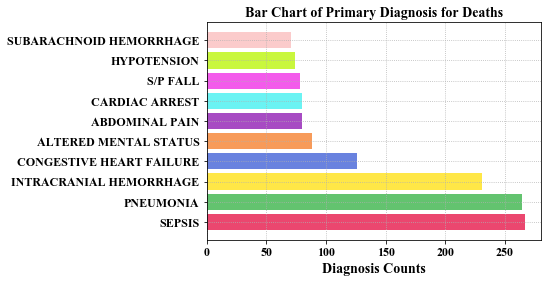

In [0]:
plt.barh(diag_count.DIAGNOSIS[:10], diag_count.diag_count[:10], align='center', alpha=0.8,color=colors[:10])
plt.title("Bar Chart of Primary Diagnosis for Deaths")
plt.xlabel("Diagnosis Counts")
plt.grid(linestyle='dotted')
plt.savefig("image/diagnosis_dist.svg",bbox_inches='tight')

Here we plotted the top 10 leading diagnosis of death by their counts. Sepsis is the # 1 cause of death.

#### Analysis of admission type

In [0]:
df_ad['DISCHTIME'] = pd.to_datetime(df_ad['DISCHTIME'])
df_ad['ADMITTIME'] = pd.to_datetime(df_ad['ADMITTIME'])
df_ad['len_stay'] = (df_ad['DISCHTIME'] - df_ad['ADMITTIME']).dt.days

In [0]:
df_ad['ADMISSION_TYPE'].value_counts()

EMERGENCY    42071
NEWBORN       7863
ELECTIVE      7706
URGENT        1336
Name: ADMISSION_TYPE, dtype: int64

<Figure size 360x252 with 0 Axes>

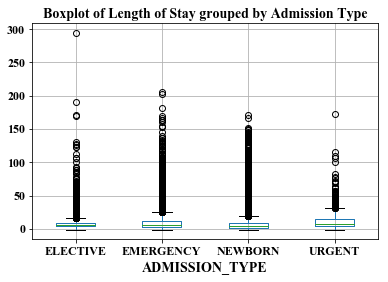

In [0]:
plt.figure(figsize=(5,3.5))
df_ad.boxplot(column=['len_stay'], by='ADMISSION_TYPE')
plt.suptitle("")
plt.title('Boxplot of Length of Stay grouped by Admission Type')
plt.savefig('image/box_adm.svg',bbox_inches='tight')
plt.show()

Most patients were admitted to the hospital in the emergency category (42071 out of 46520). The length of stay of each patient is also shown in the above boxplot. "Urgent" has the least but the most sparse average length of stay, and "Emergency" has the longest length of stay.

#### Length of Stay & Count of Diagnosis Codes Analysis

In [0]:
df_ad_code = pd.read_sql("SELECT admission.hadm_id, COUNT(icd9_code) AS Count_code FROM admission LEFT JOIN diagnosis on\
            admission.hadm_id = diagnosis.hadm_id GROUP BY admission.hadm_id ",conn)
df_ad_code.shape

(58976, 2)

In [0]:
df_adm = pd.merge(df_ad[['HADM_ID','len_stay','HOSPITAL_EXPIRE_FLAG']],df_ad_code[['HADM_ID','Count_code']],on='HADM_ID')
df_adm.head()

,HADM_ID,len_stay,HOSPITAL_EXPIRE_FLAG,Count_code
0,165315,1,0,7
1,152223,5,0,8
2,124321,6,0,10
3,161859,2,0,4
4,129635,3,0,4


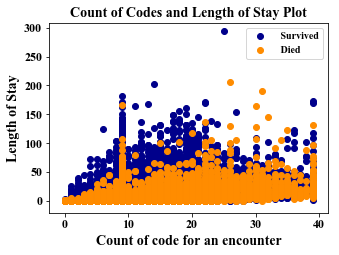

In [0]:
plt.figure(figsize=(5,3.5))
ax = plt.subplot()
plt.scatter(df_adm[df_adm['HOSPITAL_EXPIRE_FLAG']==0]['Count_code'], df_adm[df_adm['HOSPITAL_EXPIRE_FLAG']==0]['len_stay'],label= ' Survived',c='darkblue')  
plt.scatter(df_adm[df_adm['HOSPITAL_EXPIRE_FLAG']==1]['Count_code'], df_adm[df_adm['HOSPITAL_EXPIRE_FLAG']==1]['len_stay'],label= ' Died',c='darkorange')  
box = ax.get_position()
ax.legend(loc=1)
plt.xlabel('Count of code for an encounter')
plt.ylabel('Length of Stay')
plt.title('Count of Codes and Length of Stay Plot')
plt.savefig('image/code_cnt_stay.svg',bbox_inches='tight')
plt.show()

There were 58976 distinct encounters in the database. We plotted the length of stay vs. count of code for an encounter by the mortality status. If an encounter has fewer code (below 20, meaning that it is probably less serious), the patient has a higher probability to survive. In average, people who survived has a longer length of stay than people who died, and this is reasonable since people who died had more serious problems. 

In [0]:
survived_code = df_adm[df_adm['HOSPITAL_EXPIRE_FLAG']==0]['Count_code']
died_code = df_adm[df_adm['HOSPITAL_EXPIRE_FLAG']==1]['Count_code']

D:\Software\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


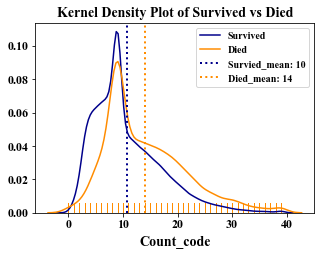

In [0]:
plt.figure(figsize=(5,3.5))
sns.distplot(survived_code,rug=True,hist=False,label='Survived',color='darkblue')
sns.distplot(died_code,rug=True,hist=False,label='Died',color='darkorange')
plt.axvline(np.mean(survived_code), linestyle=':',c = 'darkblue', linewidth=2,label = 'Survied_mean: %d' % np.mean(survived_code))
plt.axvline(np.mean(died_code), linestyle=':',c = 'darkorange', linewidth=2,label = 'Died_mean: %d' % np.mean(died_code))
plt.legend(loc=1)
plt.title('Kernel Density Plot of Survived vs Died')
plt.savefig('image/kde_code.svg',bbox_inches='tight')
plt.show()

Here we plotted the kernel density of patients divided by their count of code and the mortality status. Kernel density estimation (KDE) is a way to estimate the probability density function of a random variable, and is used here to better visualize the previous plot. Again, people died often carried more code than people who survived. 

### <span style="color:blue">ICUSTAYS</span>

#### ICU_Stay Length Analysis

In [0]:
df_icu = pd.read_sql("SELECT * FROM icustay",conn)
df_icu.head(3)

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,DBSOURCE,FIRST_CAREUNIT,LAST_CAREUNIT,FIRST_WARDID,LAST_WARDID,INTIME,OUTTIME,LOS
0,365,268,110404,280836,carevue,MICU,MICU,52,52,2198-02-14 23:27:38,2198-02-18 05:26:11,3.2490
1,366,269,106296,206613,carevue,MICU,MICU,52,52,2170-11-05 11:05:29,2170-11-08 17:46:57,3.2788
2,367,270,188028,220345,carevue,CCU,CCU,57,57,2128-06-24 15:05:20,2128-06-27 12:32:29,2.8939


In [0]:
df_icu['INTIME'] = pd.to_datetime(df_icu['INTIME'])
df_icu['OUTTIME'] = pd.to_datetime(df_icu['OUTTIME'])
df_icu['icu_stay'] = (df_icu['OUTTIME'] - df_icu['INTIME']).dt.days

In [0]:
icu_adm = pd.merge(df_adm,df_icu[['HADM_ID','icu_stay','ICUSTAY_ID']] , how = 'left', on = 'HADM_ID')
icu_adm.head(3)

,HADM_ID,len_stay,HOSPITAL_EXPIRE_FLAG,Count_code,icu_stay,ICUSTAY_ID
0,165315,1,0,7,1.0,204798.0
1,152223,5,0,8,1.0,227807.0
2,124321,6,0,10,1.0,234044.0


In [0]:
icu_adm = icu_adm.dropna(subset=['icu_stay'])

In [0]:
icu_adm.icu_stay.isnull().sum()

0

In [0]:
icu_adm_tr= icu_adm[icu_adm['icu_stay']<=50]

In [0]:
icu_adm_tr.shape

(60979, 6)

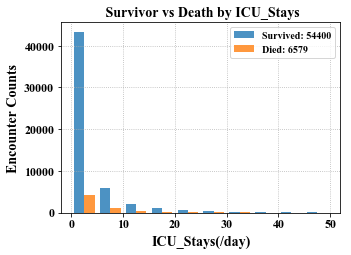

In [0]:
icu_s = icu_adm_tr[icu_adm_tr['HOSPITAL_EXPIRE_FLAG']==0]['icu_stay']
icu_d = icu_adm_tr[icu_adm_tr['HOSPITAL_EXPIRE_FLAG']==1]['icu_stay']
plt.figure(figsize=(5,3.5))
plt.hist([icu_s,icu_d],alpha=.8,label=['Survived: %d'%icu_s.shape[0],'Died: %d'%icu_d.shape[0]])
plt.legend(loc=1)
plt.grid(linestyle='dotted')
plt.xlabel("ICU_Stays(/day)")
plt.ylabel("Encounter Counts")
plt.title(" Survivor vs Death by ICU_Stays")
plt.savefig("image/icu_sd.svg",bbox_inches='tight')

There were 60979 total ICU stays which are not null values, and the number is bigger than admission encounter counts since one encounter may have more ICU counts (in and out ICU multiple times). We plotted the histogram of ICU encounter count vs. length of ICU_stays. Most patients, regardless of their mortality status, were in the range of 0-5 days of ICU stay. There were also very few people who died had more than 30 days of ICU stay. 

### <span style="color:blue"> INPUTEVENTS_MV</span>

#### Drug Itemid Counts & ICU_Stay Length Analysis

In [0]:
pd.read_sql("SELECT * FROM inputevents_mv LIMIT 3",conn)

,ROW_ID,SUBJECT_ID,HADM_ID,ICUSTAY_ID,STARTTIME,ENDTIME,ITEMID,AMOUNT,AMOUNTUOM,RATE,...,TOTALAMOUNTUOM,ISOPENBAG,CONTINUEINNEXTDEPT,CANCELREASON,STATUSDESCRIPTION,COMMENTS_EDITEDBY,COMMENTS_CANCELEDBY,COMMENTS_DATE,ORIGINALAMOUNT,ORIGINALRATE
0,241,27063,139787,223259,2133-02-05 06:29:00,2133-02-05 08:45:00,225166,6.774532,mEq,NaN,...,ml,0,0,1,Rewritten,None,RN,2133-02-05 12:52:00,10.000000,0.050000
1,242,27063,139787,223259,2133-02-05 05:34:00,2133-02-05 06:30:00,225944,28.132997,ml,30.142497,...,ml,0,0,0,FinishedRunning,None,None,None,28.132998,30.255817
2,243,27063,139787,223259,2133-02-05 05:34:00,2133-02-05 06:30:00,225166,2.813300,mEq,NaN,...,ml,0,0,0,FinishedRunning,None,None,None,2.813300,0.050426


In [0]:
df_imv = pd.read_sql("SELECT subject_id,hadm_id,icustay_id,itemid,amount,amountuom FROM inputevents_mv",conn)

In [0]:
df_imv.head(3)

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,AMOUNT,AMOUNTUOM
0,27063,139787,223259.0,225166,6.774532,mEq
1,27063,139787,223259.0,225944,28.132997,ml
2,27063,139787,223259.0,225166,2.813300,mEq


In [0]:
# As amonunt is analyzed in different units, we decidec to do analysis on drug item counts.
item_cnt = df_imv.ICUSTAY_ID.value_counts().rename('itemidcounts')

In [0]:
df_imv= df_imv.merge(item_cnt.to_frame(),left_on='ICUSTAY_ID', right_index=True)

In [0]:
df_imv_icu = df_imv.drop_duplicates(subset='ICUSTAY_ID', keep="last")
df_imv_icu.head(3)

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,ITEMID,AMOUNT,AMOUNTUOM,itemidcounts
442,27063,139787,223259.0,225797,200.000000,ml,106
350,29969,129547,248410.0,223262,8.000000,units,83
135,30354,120396,243526.0,221744,2.320253,mg,102


In [0]:
df_imv_icu_adm=pd.merge(df_imv_icu[['SUBJECT_ID','HADM_ID','ICUSTAY_ID','itemidcounts']],icu_adm[['len_stay','ICUSTAY_ID','HOSPITAL_EXPIRE_FLAG','icu_stay']],how='left',on='ICUSTAY_ID')

In [0]:
df_imv_icu_adm.head(3)

,SUBJECT_ID,HADM_ID,ICUSTAY_ID,itemidcounts,len_stay,HOSPITAL_EXPIRE_FLAG,icu_stay
0,27063,139787,223259.0,106,17,0,12.0
1,29969,129547,248410.0,83,20,0,7.0
2,30354,120396,243526.0,102,14,0,14.0


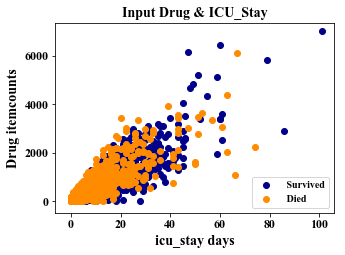

In [0]:
plt.figure(figsize=(5,3.5))
ax = plt.subplot()
plt.scatter(df_imv_icu_adm[df_imv_icu_adm['HOSPITAL_EXPIRE_FLAG']==0]['icu_stay'], df_imv_icu_adm[df_imv_icu_adm['HOSPITAL_EXPIRE_FLAG']==0]['itemidcounts'],label= ' Survived',c='darkblue')  
plt.scatter(df_imv_icu_adm[df_imv_icu_adm['HOSPITAL_EXPIRE_FLAG']==1]['icu_stay'], df_imv_icu_adm[df_imv_icu_adm['HOSPITAL_EXPIRE_FLAG']==1]['itemidcounts'],label= ' Died',c='darkorange')  
box = ax.get_position()
ax.legend(loc=4)
plt.xlabel('icu_stay days')
plt.ylabel('Drug itemcounts')
plt.title('Input Drug & ICU_Stay')
plt.savefig('image/drug_icu.svg',bbox_inches='tight')
plt.show()

Here a scatter plot of drug counts vs. length of ICU stay is shown, grouped by their mortality status. It illustrates a positive correlation - longer ICU stays renders more drug dispensed. The plot is also highly dense at the lower left corner, meaning that most people, regardless of whether they survivded, have short ICU stays and few drug given. 

In [0]:
survived_code = df_imv_icu_adm[df_imv_icu_adm['HOSPITAL_EXPIRE_FLAG']==0]['itemidcounts']
died_code = df_imv_icu_adm[df_imv_icu_adm['HOSPITAL_EXPIRE_FLAG']==1]['itemidcounts']

D:\Software\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


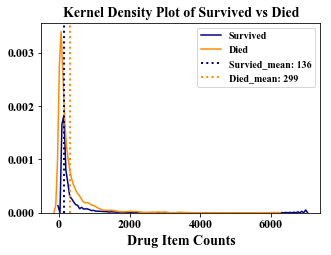

In [0]:
plt.figure(figsize=(5,3.5))
sns.distplot(survived_code,hist=False,label='Survived',color='darkblue')
sns.distplot(died_code,hist=False,label='Died',color='darkorange')
plt.axvline(np.mean(survived_code), linestyle=':',c = 'darkblue', linewidth=2,label = 'Survied_mean: %d' % np.mean(survived_code))
plt.axvline(np.mean(died_code), linestyle=':',c = 'darkorange', linewidth=2,label = 'Died_mean: %d' % np.mean(died_code))
plt.legend(loc=1)
plt.xlabel("Drug Item Counts")
plt.title('Kernel Density Plot of Survived vs Died')
plt.savefig('image/kde_drug.svg',bbox_inches='tight')
plt.show()

To avoid overlapping plotting problems, another kernel density plot is shown above, showing a deeper understanding of drugs given to a patient and their mortality status. It is left skewed, corresponding to the lower left corner in the previous graph. 

### <span style="color:blue"> Processed Dataset with 17 Features vs 150 Features</span>

#### Dataset with 17 features

In [0]:
df_17 = pd.read_csv(r"D:\Study\mimic-code\generated_data\final_df17.csv")
df_17.head(3)

,Unnamed: 0,HADM_ID,723,454,184,223900,223901,220739,51,455,...,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_NEWBORN,ADMISSION_TYPE_URGENT,ADMITTIME,DOB,age,diag17_171,diag17_172,1_yr_mortality
0,0,100006.0,5.000000,6.0,4.000000,NaN,NaN,NaN,NaN,140.509434,...,0,1,0,0,2108-04-06 15:49:00,2059-05-07 00:00:00,48.0,NaN,NaN,0
1,1,100007.0,4.592593,6.0,3.925926,NaN,NaN,NaN,NaN,140.746835,...,0,1,0,0,2145-03-31 05:33:00,2071-06-04 00:00:00,73.0,NaN,NaN,0
2,2,100021.0,3.227273,5.0,3.375000,NaN,NaN,NaN,NaN,125.000000,...,0,1,0,0,2109-08-17 10:55:00,2054-10-24 00:00:00,54.0,NaN,NaN,0


In [0]:
df_17 = df_17.drop(['Unnamed: 0'],axis=1)
df_17.head(2)

,HADM_ID,723,454,184,223900,223901,220739,51,455,220179,...,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_NEWBORN,ADMISSION_TYPE_URGENT,ADMITTIME,DOB,age,diag17_171,diag17_172,1_yr_mortality
0,100006.0,5.000000,6.0,4.000000,NaN,NaN,NaN,NaN,140.509434,NaN,...,0,1,0,0,2108-04-06 15:49:00,2059-05-07 00:00:00,48.0,NaN,NaN,0
1,100007.0,4.592593,6.0,3.925926,NaN,NaN,NaN,NaN,140.746835,NaN,...,0,1,0,0,2145-03-31 05:33:00,2071-06-04 00:00:00,73.0,NaN,NaN,0


In [0]:
# For preliminary study, we simply drop catagorical columns
df_17 = df_17.drop(['ADMITTIME','DOB'],axis=1)

In [0]:
# Drop columns which has more than 20% null values
limitPer = df_17.shape[0] * .8
df_17=df_17.dropna(thresh=limitPer,axis=1)

In [0]:
df_17.shape

(56730, 12)

Here we notice that after null values filtering, we left 12 columns which contains no more than 20% missing values for our dataset

In [0]:
# find columns which have null values
df_17.columns[df_17.isna().any()].tolist()

['50882', '50971', '50983', '51006', '51301', 'age']

In [0]:
# fill null value with its column mean
df_17 = df_17.fillna(df_17.mean())

In [0]:
df_17.head(3)

,HADM_ID,50882,50971,50983,51006,51301,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_NEWBORN,ADMISSION_TYPE_URGENT,age,1_yr_mortality
0,100006.0,29.384615,4.076923,131.384615,17.076923,9.700000,0,1,0,0,48.0,0
1,100007.0,24.888889,3.955556,139.111111,14.222222,7.375000,0,1,0,0,73.0,0
2,100021.0,25.431373,3.949020,138.823529,12.058824,5.685417,0,1,0,0,54.0,0


In [0]:
df_17.head(3)

,HADM_ID,50882,50971,50983,51006,51301,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_NEWBORN,ADMISSION_TYPE_URGENT,age,1_yr_mortality
0,100006.0,29.384615,4.076923,131.384615,17.076923,9.700000,0,1,0,0,48.0,0
1,100007.0,24.888889,3.955556,139.111111,14.222222,7.375000,0,1,0,0,73.0,0
2,100021.0,25.431373,3.949020,138.823529,12.058824,5.685417,0,1,0,0,54.0,0


In [0]:
X = df_17.loc[:,'50882':'age']
X.head(3)

,50882,50971,50983,51006,51301,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_NEWBORN,ADMISSION_TYPE_URGENT,age
0,29.384615,4.076923,131.384615,17.076923,9.700000,0,1,0,0,48.0
1,24.888889,3.955556,139.111111,14.222222,7.375000,0,1,0,0,73.0
2,25.431373,3.949020,138.823529,12.058824,5.685417,0,1,0,0,54.0


In [0]:
y = df_17['1_yr_mortality']

In [0]:
keys = X.columns.tolist()
keys

['50882',
 '50971',
 '50983',
 '51006',
 '51301',
 'ADMISSION_TYPE_ELECTIVE',
 'ADMISSION_TYPE_EMERGENCY',
 'ADMISSION_TYPE_NEWBORN',
 'ADMISSION_TYPE_URGENT',
 'age']

In [0]:
# Rename X column name
X.columns = ['50882',
 '50971',
 '50983',
 '51006',
 '51301',
 'ELECTIVE',
 'EMERGENCY',
 'NEWBORN',
 'URGENT',
 'age']

In [0]:
X.head()

,50882,50971,50983,51006,51301,ELECTIVE,EMERGENCY,NEWBORN,URGENT,age
0,29.384615,4.076923,131.384615,17.076923,9.700000,0,1,0,0,48.00000
1,24.888889,3.955556,139.111111,14.222222,7.375000,0,1,0,0,73.00000
2,25.431373,3.949020,138.823529,12.058824,5.685417,0,1,0,0,54.00000
3,25.153512,4.162772,138.742702,25.211551,11.431012,0,0,1,0,62.03666
4,25.153512,4.162772,138.742702,25.211551,10.100000,0,0,1,0,62.03666


D:\Software\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  


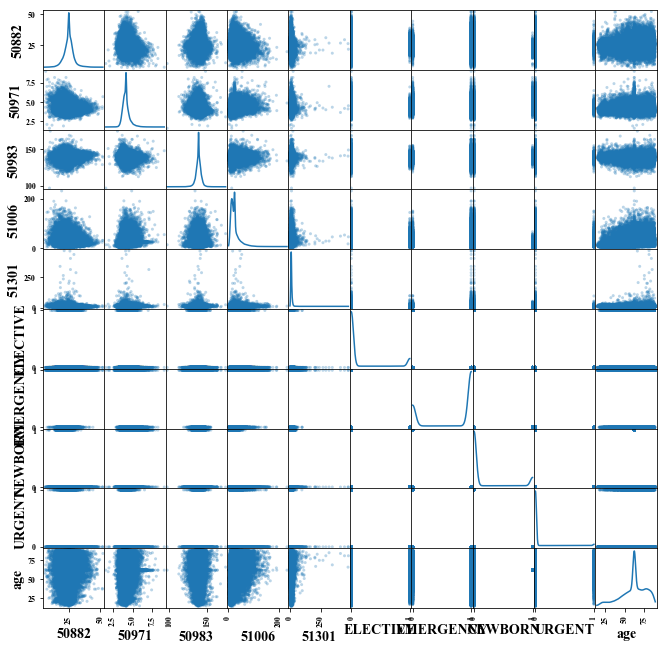

In [0]:
# Plot coleration of X features
fig1 = pd.scatter_matrix(X[X.columns], alpha = 0.3, figsize = (11,11), diagonal = 'kde')
plt.savefig('image/scatter_detail_pre.tif')

#### Dataset with 150 features

Missing value analysis

In [0]:
df_150 = pd.read_csv(r"D:\Study\mimic-code\generated_data\final_final.csv")
df_150.shape

(56730, 156)

In [0]:
df_150.head(3)

,Unnamed: 0,Unnamed: 0.1,HADM_ID,30001,30005,30006,30013,30015,30018,30020,...,51301,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_NEWBORN,ADMISSION_TYPE_URGENT,ADMITTIME,DOB,age,diag17_171,diag17_172
0,0,0,100006.0,NaN,NaN,NaN,21.260000,NaN,56.111111,NaN,...,9.700000,0,1,0,0,2108-04-06 15:49:00,2059-05-07 00:00:00,48.0,NaN,NaN
1,1,1,100007.0,NaN,NaN,NaN,104.687500,111.280488,166.666667,NaN,...,7.375000,0,1,0,0,2145-03-31 05:33:00,2071-06-04 00:00:00,73.0,NaN,NaN
2,2,2,100021.0,NaN,NaN,NaN,133.333333,90.869565,45.368852,NaN,...,5.685417,0,1,0,0,2109-08-17 10:55:00,2054-10-24 00:00:00,54.0,NaN,NaN


In [0]:
df_150 = df_150.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1)
df_150.head(2)

,HADM_ID,30001,30005,30006,30013,30015,30018,30020,30021,30025,...,51301,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_NEWBORN,ADMISSION_TYPE_URGENT,ADMITTIME,DOB,age,diag17_171,diag17_172
0,100006.0,NaN,NaN,NaN,21.2600,NaN,56.111111,NaN,NaN,825.0,...,9.700,0,1,0,0,2108-04-06 15:49:00,2059-05-07 00:00:00,48.0,NaN,NaN
1,100007.0,NaN,NaN,NaN,104.6875,111.280488,166.666667,NaN,NaN,NaN,...,7.375,0,1,0,0,2145-03-31 05:33:00,2071-06-04 00:00:00,73.0,NaN,NaN


In [0]:
df_17 = pd.read_csv(r"D:\Study\mimic-code\generated_data\final_df17.csv")

In [0]:
df_17 = df_17.drop(['Unnamed: 0'],axis=1)
df_17.head(3)

,HADM_ID,723,454,184,223900,223901,220739,51,455,220179,...,ADMISSION_TYPE_ELECTIVE,ADMISSION_TYPE_EMERGENCY,ADMISSION_TYPE_NEWBORN,ADMISSION_TYPE_URGENT,ADMITTIME,DOB,age,diag17_171,diag17_172,1_yr_mortality
0,100006.0,5.000000,6.0,4.000000,NaN,NaN,NaN,NaN,140.509434,NaN,...,0,1,0,0,2108-04-06 15:49:00,2059-05-07 00:00:00,48.0,NaN,NaN,0
1,100007.0,4.592593,6.0,3.925926,NaN,NaN,NaN,NaN,140.746835,NaN,...,0,1,0,0,2145-03-31 05:33:00,2071-06-04 00:00:00,73.0,NaN,NaN,0
2,100021.0,3.227273,5.0,3.375000,NaN,NaN,NaN,NaN,125.000000,NaN,...,0,1,0,0,2109-08-17 10:55:00,2054-10-24 00:00:00,54.0,NaN,NaN,0


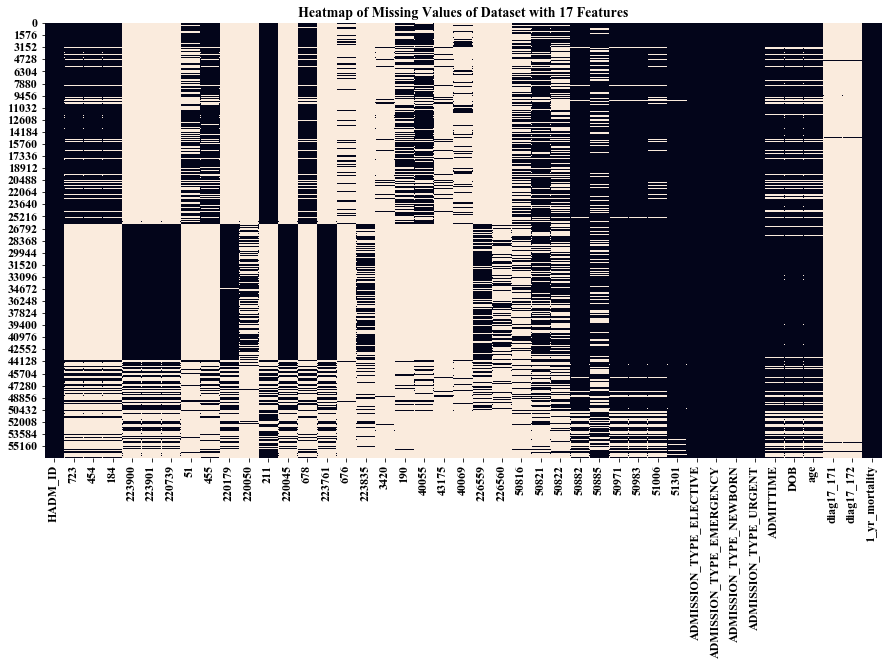

In [0]:
fig,ax = plt.subplots(figsize=(15,8))
sns.heatmap(df_17.isnull(),cbar = False, ax =ax)
plt.title("Heatmap of Missing Values of Dataset with 17 Features")
plt.savefig('image/df_17_missing.tif',bbox_inches='tight')

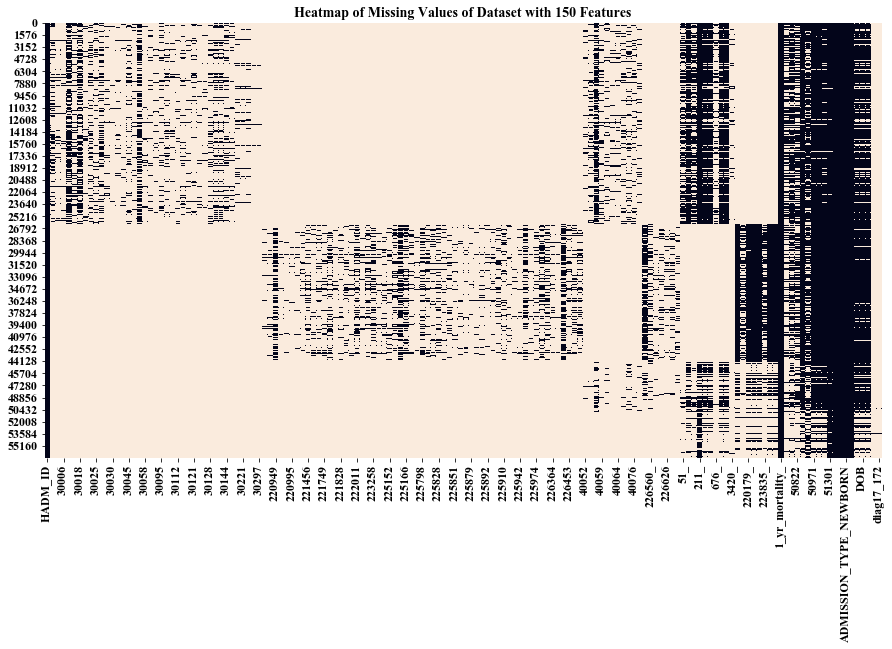

In [0]:
fig,ax = plt.subplots(figsize=(15,8))
sns.heatmap(df_150.isnull(),cbar = False, ax =ax)
plt.title("Heatmap of Missing Values of Dataset with 150 Features")
plt.savefig('image/df_150_missing.tif',bbox_inches='tight')

In [0]:
# Show missing value proportion of each columns
null_list_17 = df_17.isnull().sum()/len(df_17)
null_list_17[:10]

HADM_ID    0.000000
723        0.520800
454        0.520853
184        0.520747
223900     0.614490
223901     0.614543
220739     0.614437
51         0.715565
455        0.534127
220179     0.617751
dtype: float64

In [0]:
# Drop columns which contains more than 0.2 missing values 
limitPer = df_17.shape[0] * .8
df_17_dn=df_17.dropna(thresh=limitPer,axis=1)
df_17_dn.shape

(56730, 14)

In [0]:
df_150.shape

(56730, 154)

In [0]:
# # Show missing value proportion of each columns
null_list_150 = df_150.isnull().sum()/len(df_150)
null_list_150[:10]

HADM_ID    0.000000
30001      0.871743
30005      0.953763
30006      0.973189
30013      0.682426
30015      0.913203
30018      0.729825
30020      0.964040
30021      0.876326
30025      0.931465
dtype: float64

In [0]:
# Drop columns which contains more than 0.2 missing values 
limitPer = df_150.shape[0] * .8
df_150=df_150.dropna(thresh=limitPer,axis=1)
df_150.shape

(56730, 14)

From above we could see that if we exclude columns which contains more than 20% missing values for both datasets, we observed that for dataset which contained 17 features it finally has 14 columns, and for dataset which contained 150 features it finally has 14 columns as well.
This means that the second data set added a lot of nonvaluable features, which brings us both dataset generated similar model performance.